# **Libraries**

In [2]:
from matplotlib import pyplot as plt
import time
import numpy as np
import datetime
import pandas as pd
from datetime import datetime
from pylab import *

# **Preprocessing**

## I-80

In [3]:
path='/home/m/Desktop/NGSIM/original/I-80.csv'
dfI=pd.read_csv(path)
dfI.columns = ['Vehicle_ID', 'Frame_ID', 'Total_Frames', 'Global_Time', 'Local_X', 'Local_Y',
              'Global_X', 'Global_Y', 'v_length', 'v_Width', 'v_Class', 'v_Vel', 'v_Acc', 'Lane_ID',
              'O_Zone', 'D_Zone', 'Int_ID', 'Section_ID', 'Direction', 'Movement', 'Preceding', 'Following',
              'Space_Headway', 'Time_Headway', 'Location']
dfI.drop('D_Zone',axis=1,inplace=True)
dfI.drop('O_Zone',axis=1,inplace=True)
dfI.drop('Int_ID',axis=1,inplace=True)
dfI.drop('Section_ID',axis=1,inplace=True)
dfI.drop('Direction',axis=1,inplace=True)
dfI.drop('Movement',axis=1,inplace=True)
dfI.drop('Location',axis=1,inplace=True)
dfI.drop('Global_X',axis=1,inplace=True)
dfI.drop('Global_Y',axis=1,inplace=True)
dfI.drop('Preceding',axis=1,inplace=True)
dfI.drop('Following',axis=1,inplace=True)
dfI.drop('Space_Headway',axis=1,inplace=True)
dfI.drop('Time_Headway',axis=1,inplace=True)
#df.drop(df[df.Lane_ID > 5].index, inplace=True)
dfI.drop(dfI[dfI.v_Class == 3].index, inplace=True)
dfI.drop(dfI[dfI.v_Class == 1].index, inplace=True)
dfI.drop('v_Width',axis=1,inplace=True)
dfI.drop('v_length',axis=1,inplace=True)
dfI.drop('v_Class',axis=1,inplace=True)
dfI["Local_X"] = 0.3048 * dfI["Local_X"]
dfI["Local_Y"] = 0.3048 * dfI["Local_Y"]
dfI["v_Vel"] = 0.3048 * dfI["v_Vel"]
dfI["v_Acc"] = 0.3048 * dfI["v_Acc"]
#df["Vehicle_ID"]=df["Vehicle_ID"].astype('str')
dfI['Global_Time']=pd.to_datetime(dfI['Global_Time'],unit='ms')
dfI.sort_values(['Vehicle_ID','Total_Frames','Frame_ID','Global_Time'],inplace=True)
dfI['Global_Time']=dfI['Global_Time'].dt.strftime('%H:%M:%S:%f')
#dfI

## Us-101

In [4]:
path1='/home/m/Desktop/NGSIM/original/us-101.csv'
dfUS=pd.read_csv(path1)
dfUS.columns = ['Vehicle_ID', 'Frame_ID', 'Total_Frames', 'Global_Time', 'Local_X', 'Local_Y', 'Global_X', 'Global_Y', 'v_length', 'v_Width', 'v_Class', 'v_Vel', 'v_Acc', 'Lane_ID', 'O_Zone', 'D_Zone', 'Int_ID', 'Section_ID', 'Direction', 'Movement', 'Preceding', 'Following', 'Space_Headway', 'Time_Headway', 'Location']
#df.drop(df[df.Lane_ID > 5].index, inplace=True)
dfUS.drop('D_Zone',axis=1,inplace=True)
dfUS.drop('O_Zone',axis=1,inplace=True)
dfUS.drop('Int_ID',axis=1,inplace=True)
dfUS.drop('Section_ID',axis=1,inplace=True)
dfUS.drop('Direction',axis=1,inplace=True)
dfUS.drop('Movement',axis=1,inplace=True)
dfUS.drop('Location',axis=1,inplace=True)
dfUS.drop('Global_X',axis=1,inplace=True)
dfUS.drop('Global_Y',axis=1,inplace=True)
dfUS.drop('Preceding',axis=1,inplace=True)
dfUS.drop('Following',axis=1,inplace=True)
dfUS.drop('Space_Headway',axis=1,inplace=True)
dfUS.drop('Time_Headway',axis=1,inplace=True)
dfUS.drop(dfUS[dfUS.v_Class == 3].index, inplace=True)
dfUS.drop(dfUS[dfUS.v_Class == 1].index, inplace=True)
dfUS.drop('v_Width',axis=1,inplace=True)
dfUS.drop('v_length',axis=1,inplace=True)
dfUS.drop('v_Class',axis=1,inplace=True)
dfUS["Local_X"] = 0.3048 * dfUS["Local_X"]
dfUS["Local_Y"] = 0.3048 * dfUS["Local_Y"]
dfUS["v_Vel"] = 0.3048 * dfUS["v_Vel"]
dfUS["v_Acc"] = 0.3048 * dfUS["v_Acc"]
#df["Vehicle_ID"]=df["Vehicle_ID"].astype('str')
dfUS['Global_Time']=pd.to_datetime(dfUS['Global_Time'],unit='ms')
dfUS.sort_values(['Vehicle_ID','Total_Frames','Frame_ID','Global_Time'],inplace=True)
dfUS['Global_Time']=dfUS['Global_Time'].dt.strftime('%H:%M:%S:%f')
dfUS

,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,v_Vel,v_Acc,Lane_ID
1187479,1,137,421,15:19:30:700000,16.050768,22.529597,7.620000,0.000000,5
3724950,1,138,421,15:19:30:800000,16.047110,23.291597,7.620000,0.000000,5
3704674,1,139,421,15:19:30:900000,16.043148,24.053292,7.620000,0.000000,5
3694390,1,140,421,15:19:31:000000,16.039186,24.815597,7.620000,0.000000,5
3395371,1,141,421,15:19:31:100000,16.035223,25.577597,7.620000,0.000000,5
...,...,...,...,...,...,...,...,...,...
2712535,3109,7188,510,15:01:37:700000,17.500397,640.711546,15.361920,1.508760,5
1344634,3109,7189,510,15:01:37:800000,17.494910,642.250481,15.553944,2.359152,5
200256,3109,7190,510,15:01:37:900000,17.498873,643.778748,15.553944,0.000000,5
953526,3109,7191,510,15:01:38:000000,17.497654,645.455453,15.553944,0.000000,5


# Information about Dataset

## I-80

In [ ]:
print("max and min of I-80 width ","   max: ",dfI['Local_X'].max(),"  min: ",dfI['Local_X'].min())
print("max and min of I-80 Lenght","   max: ",dfI['Local_Y'].max(),"   min: ",dfI['Local_Y'].min())

## US-101

In [ ]:
print("max and min of US-101 width","   max: ",dfUS['Local_X'].max(),"  min: ",dfUS['Local_X'].min())
print("max and min of US-101 Lenght","   max: ",dfUS['Local_Y'].max(),"  min: ",dfUS['Local_Y'].min())

# Plot processed Data

## I-80

In [5]:
groupedI = dfI.groupby(['Vehicle_ID','Total_Frames'])
Vehicles_Trajectoy_I=[]
for name, group in groupedI:
    Vehicles_Trajectoy_I.append(group)
print("number of total I-80 trajectories    : ",len(Vehicles_Trajectoy_I))
del Vehicles_Trajectoy_I[2959 : 2961]### داده ۲۹۶۰ یه داده ی معیوبه


number of total I-80 trajectories    :  5404


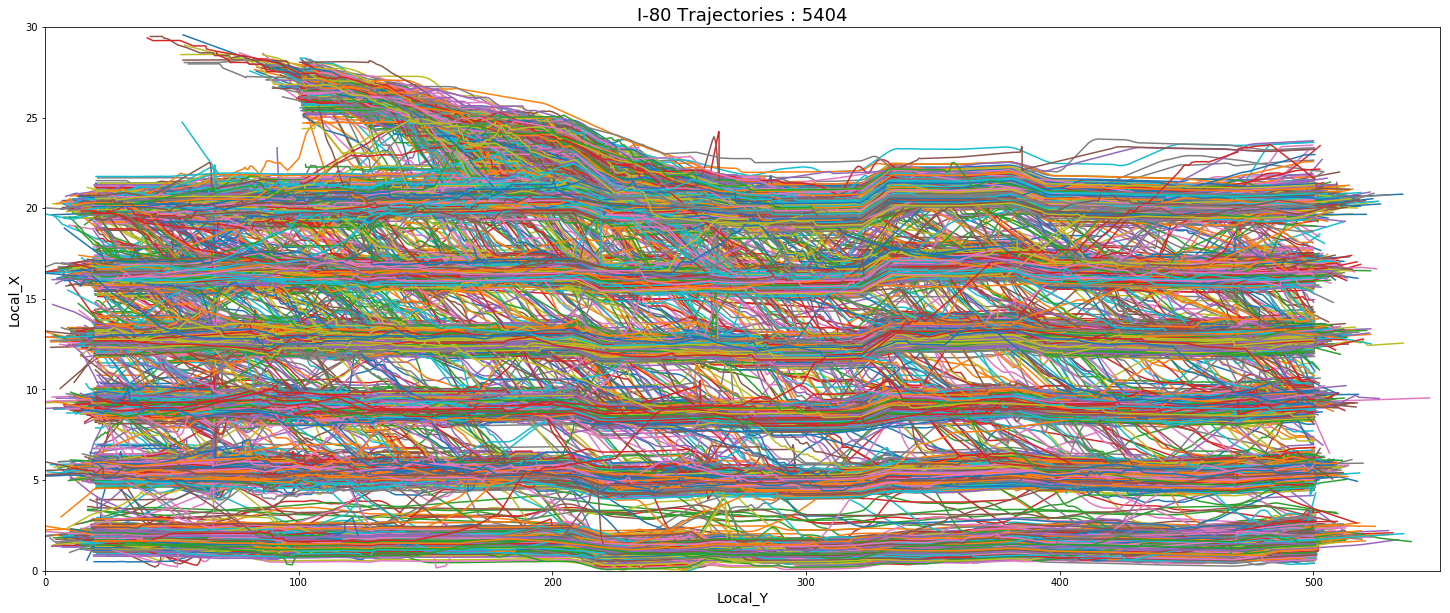

In [6]:
figure(figsize=(25,10))
for path in Vehicles_Trajectoy_I:
    path=path.to_numpy()
    yline = path[:,[4]].flatten()
    xline = path[:,[5]].flatten()
    plt.xlim(0, 550) 
    plt.ylim(0, 30)
    plt.plot(xline, yline)
    plt.title("I-80 Trajectories : 5404",fontsize=18)
    plt.xlabel('Local_Y', fontsize=14)
    plt.ylabel('Local_X', fontsize=14)


## US-101

In [6]:
groupedUS = dfUS.groupby(['Vehicle_ID','Total_Frames'])
Vehicles_Trajectoy_US=[]
for name, group in groupedUS:
    Vehicles_Trajectoy_US.append(group)
print("number of total US-101 trajectories    : ",len(Vehicles_Trajectoy_US))

number of total US-101 trajectories    :  5918


In [ ]:
figure(figsize=(25,10))
for path in Vehicles_Trajectoy_US:
    path=path.to_numpy()
    yline = path[:,[4]].flatten()
    xline = path[:,[5]].flatten()
    plt.xlim(0, 700) 
    plt.ylim(0, 23)
    plt.plot(xline, yline)
    plt.title("US-101 Trajectories : 5918",fontsize=18)
    plt.xlabel('Local_Y', fontsize=14)
    plt.ylabel('Local_X', fontsize=14)

# Maneuver Labeling

## I-80

In [7]:
lane_keep_I=[]
lane_change_left_I=[]
lane_change_right_I=[]

for path in Vehicles_Trajectoy_I:
    path.reset_index(inplace=True,drop=True)
    if len(path['Lane_ID'].value_counts())>1:
         for i in path['Lane_ID'].diff()[lambda x: x != 0].index.tolist():
             p=pd.concat([path[i-30:i],path[i:i+30]],ignore_index=True)
             if (p['Local_X'].max()-p['Local_X'].min()>3.5) and (p['Local_Y'].max()-p['Local_Y'].min()<300)and (len(p)==60):
                 trend=[p['Lane_ID'][h] for h in p['Lane_ID'].diff()[lambda x: x != 0].index.tolist()]

                 if (trend[0]<trend[1]) and (len(trend)==2):
                     lane_change_right_I.append(p)
                 elif (trend[0]>trend[1]) and (len(trend)==2):
                     lane_change_left_I.append(p)
    elif len(path['Lane_ID'].value_counts())==1:
         chunks = [path[x:x+60] for x in range(0, len(path), 60)]
         for i in chunks: 
             if (i['Local_X'].max()-i['Local_X'].min()<1) and (len(i)==60):
                 lane_keep_I.append(i)
                 #print("#############Lane keep number ",len(i))
                    
print("number of lane keep sequence           : ",len(lane_keep_I))
print("number of lane change left sequence    : ",len(lane_change_left_I))
print("number of lane change right sequence   : ",len(lane_change_right_I))



# indexes_change_left_I  = [4,7,29,31,40,50,52,69,87,91,106,111,116,117,124,127,133,135,141,143,148,156,176,177,182,199,206,207,209,220,
#      223,228,236,239,242,245,259,260,264,267,270,271,282,286,292,293,305,308,310,314,320,323,327,333,341,358,359,
#      366,371,373,378,382,383,389,392,398,399,400,401,403,405,406,411,414,416,430,433,437,445,447,448,456,459,466,
#      469,471,477,481,484,485,490,498,503,506,507,511,514,518,521,528,529,530,531,542,543,549,553,554,557,562,563,
#      564,565,573,577,579,581,583,586,591,597,601,606,608,611,612,614,619,623,624,628,630,631,635,636,637,644,646,
#      654,657,661,663,670,672,673,674,676,679,681,682,684,687,688,689,695,711,712,713,714,715,717,719,722,724,726,
#      727,729,730,731,734,739,742,749,752,753,757,763,765,767,773,775,776,779,780,786,787,789,793,796,797,798,802,
#      804,806,808,813,816,819,821,825,829,831,834,837,838,840,842,843,846,849,854,856,860,862,865,872,874,875,876,
#      879,880,881,883,885,886,898,899,902,903,904,906,909,912,916,922,923,924,925,926,927]

# for index in sorted(indexes_change_left_I , reverse=True):
#     del lane_change_left_I[index] 

    
# indexes_lane_keep_I=[2,3,11,16,17,22,25,26,27,28,29,30,39,45,56,59,64,65,68,70,75,80,88,100,101,102,103,107,109,110,
#                    115,119,123,124,127,135,136,137,148,152,162,166,171,176,177,190,195,196,197,200,205,211,215,224,
#                    229,230,241,246,249]
# for index in sorted(indexes_lane_keep_I , reverse=True):
#     del lane_keep_I[index]    
# ### Delete 2 of bad maneuver
# del lane_change_right_I[61 : 62]
# del lane_change_right_I[70 : 71]

# lane_keep_I=lane_keep_I[:142]


# print("number of lane keep sequence           : ",len(lane_keep_I))
# print("number of lane change left sequence    : ",len(lane_change_left_I))
# print("number of lane change right sequence   : ",len(lane_change_right_I))




number of lane keep sequence           :  43592
number of lane change left sequence    :  462
number of lane change right sequence   :  86


### Select good trajectory I-80 ;)

In [1]:
count=0
for path in lane_change_right_I:
#     print("##########################################  ",count,"  ###############################################")
    path=path.to_numpy()
    yline = path[:,[4]].flatten()
    xline = path[:,[5]].flatten()
    figure(figsize=(25,10))
    plt.xlim(0, 550)
    plt.ylim(0, 30)
    plt.plot(xline, yline)
    plt.xlabel('Local_Y', fontsize=16)
    plt.ylabel('Local_X', fontsize=16)
#     plt.show()
#     count=count+1
#     a=input ("number")
#     if a!="finish":
#         pass
#     else:
#         break

NameError: name 'lane_change_right_I' is not defined

##########################################   0   ###############################################


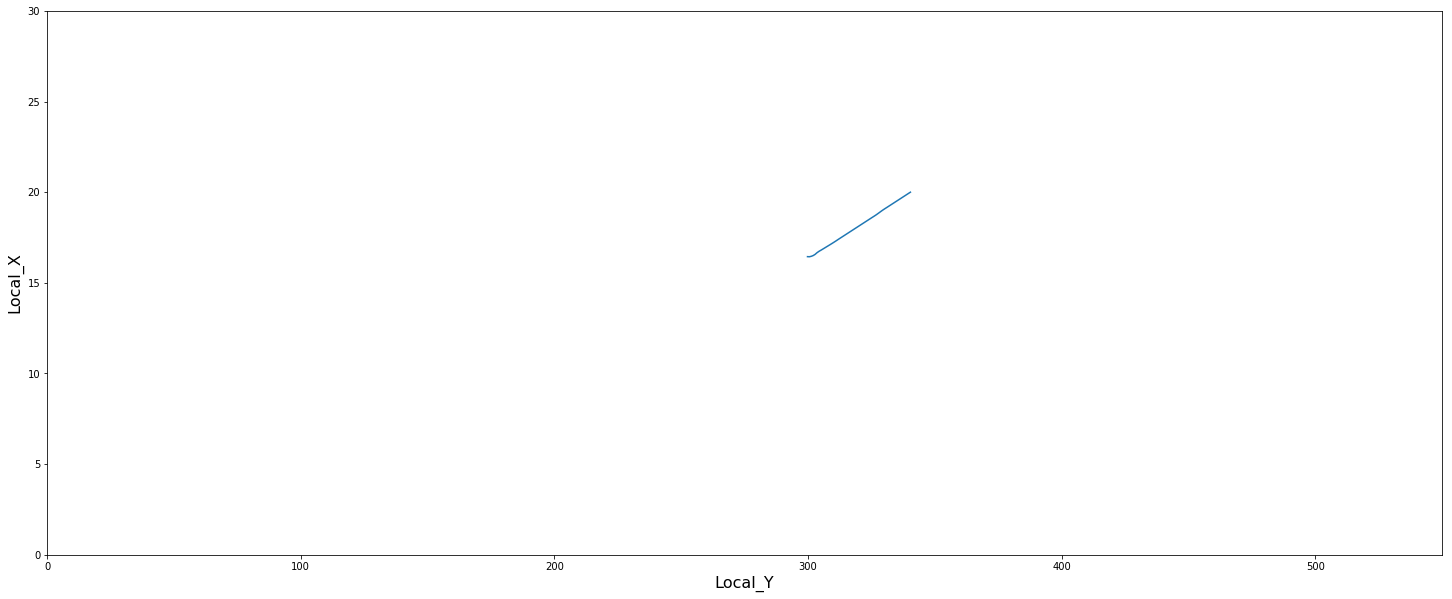

##########################################   1   ###############################################


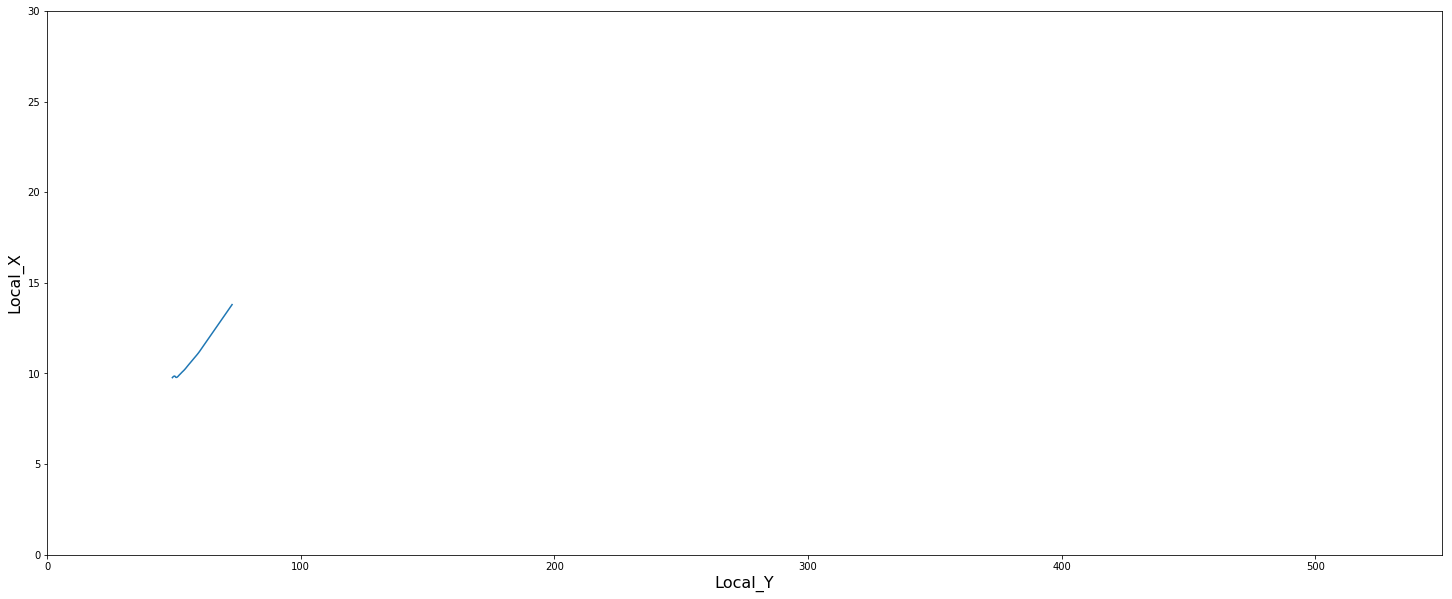

##########################################   2   ###############################################


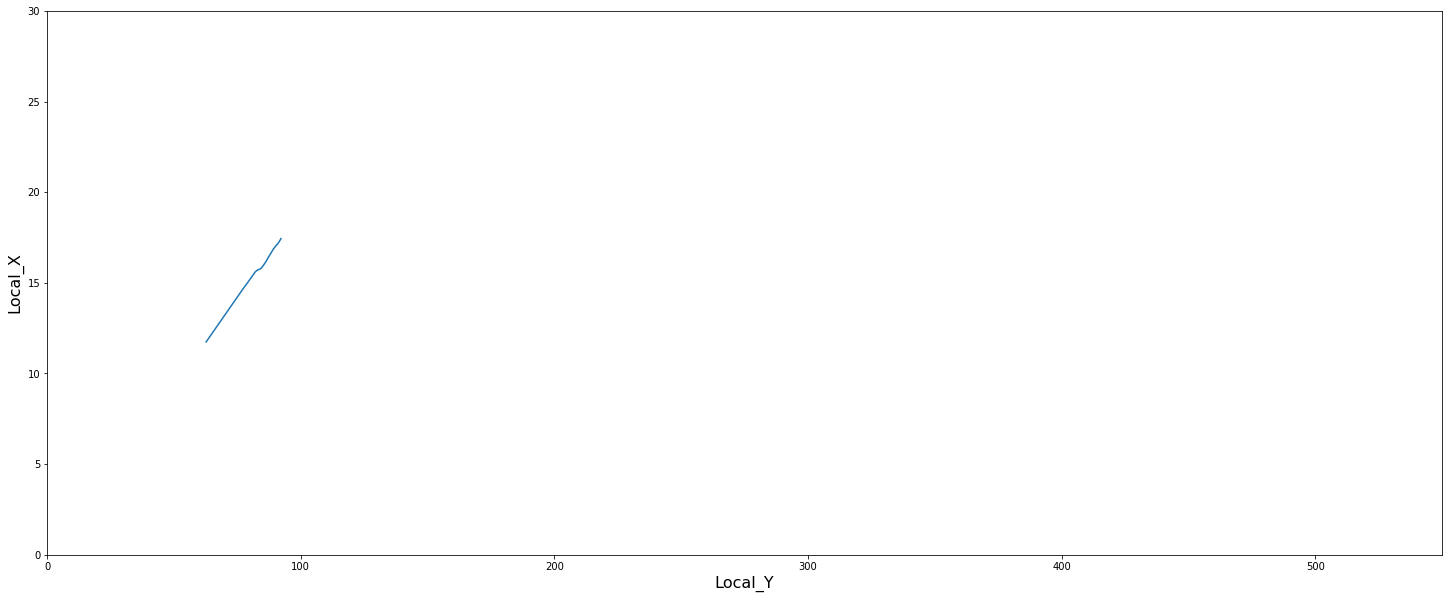

##########################################   3   ###############################################


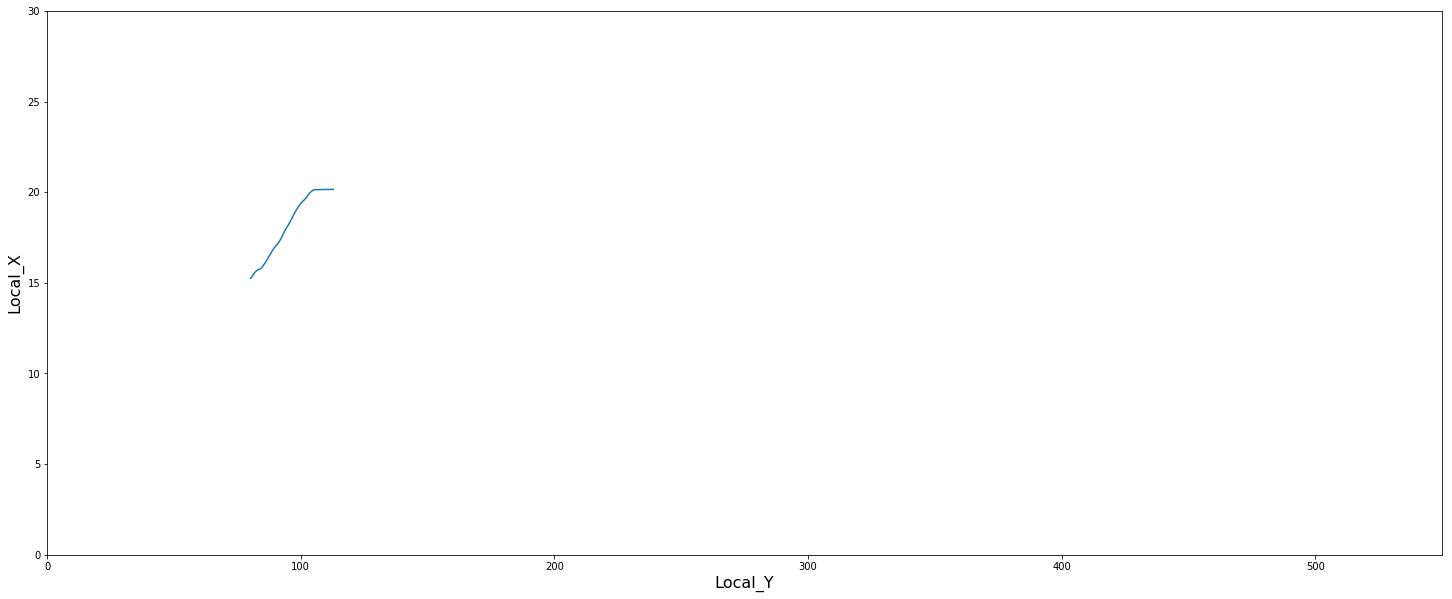

##########################################   4   ###############################################


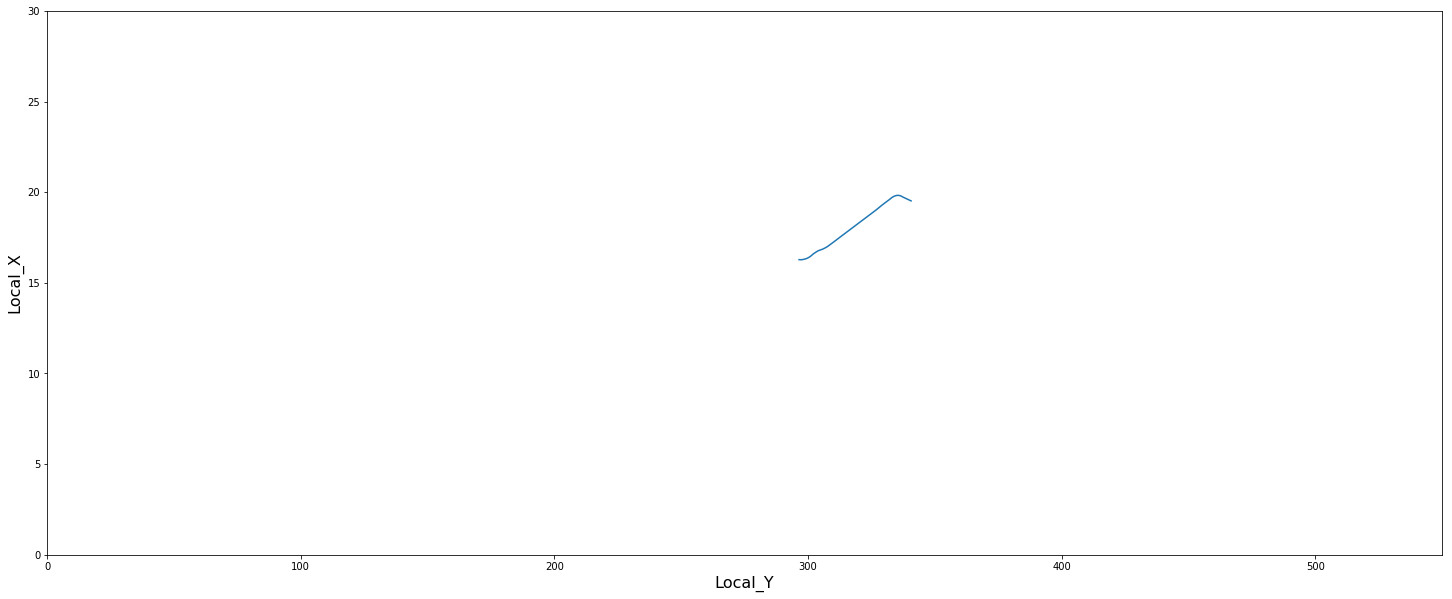

##########################################   5   ###############################################


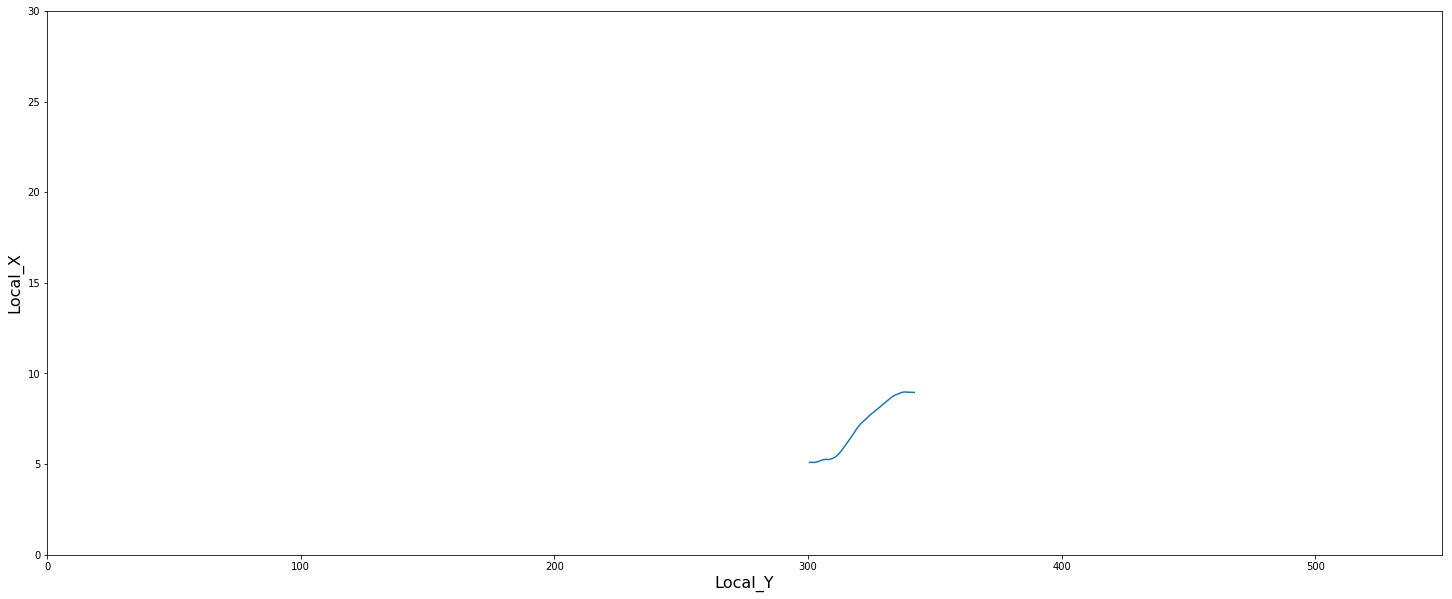

##########################################   6   ###############################################


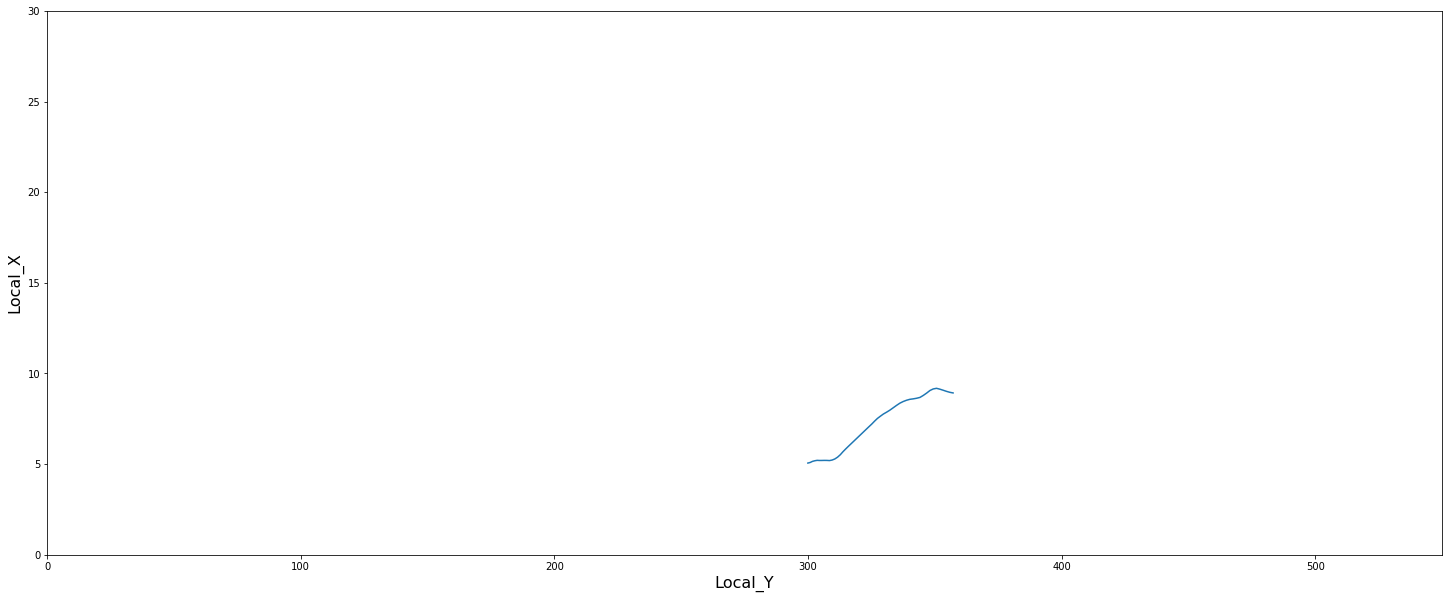

##########################################   7   ###############################################


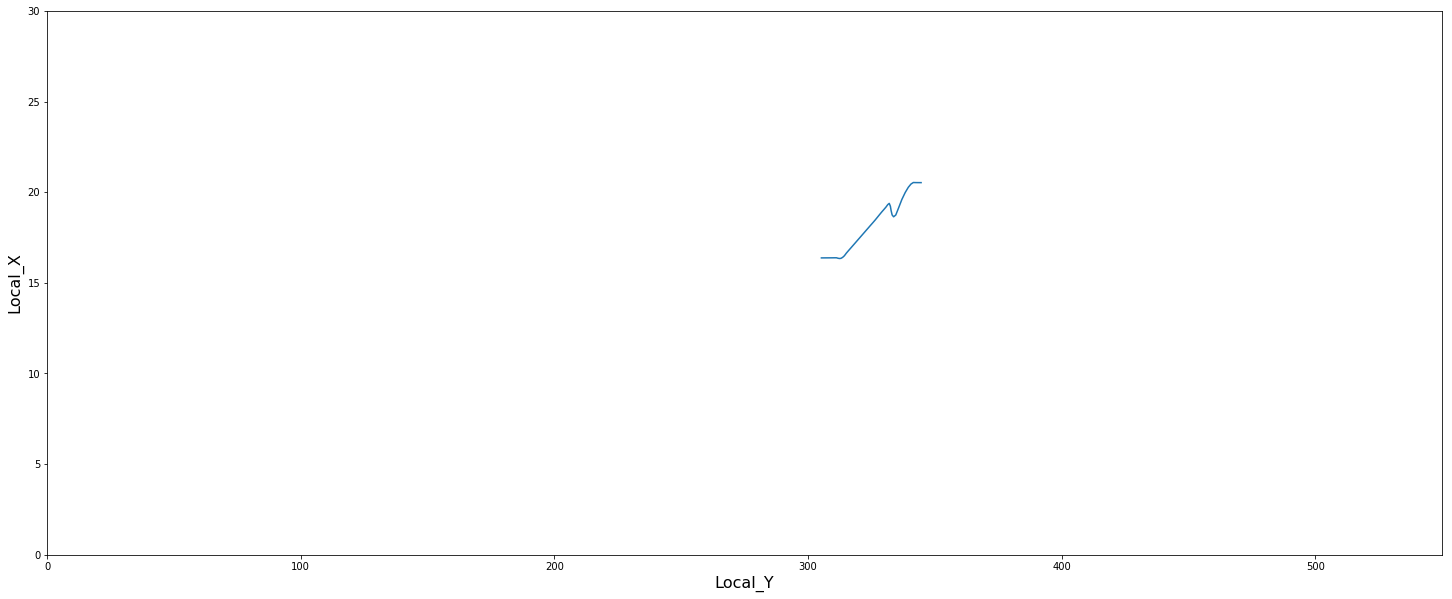

##########################################   8   ###############################################


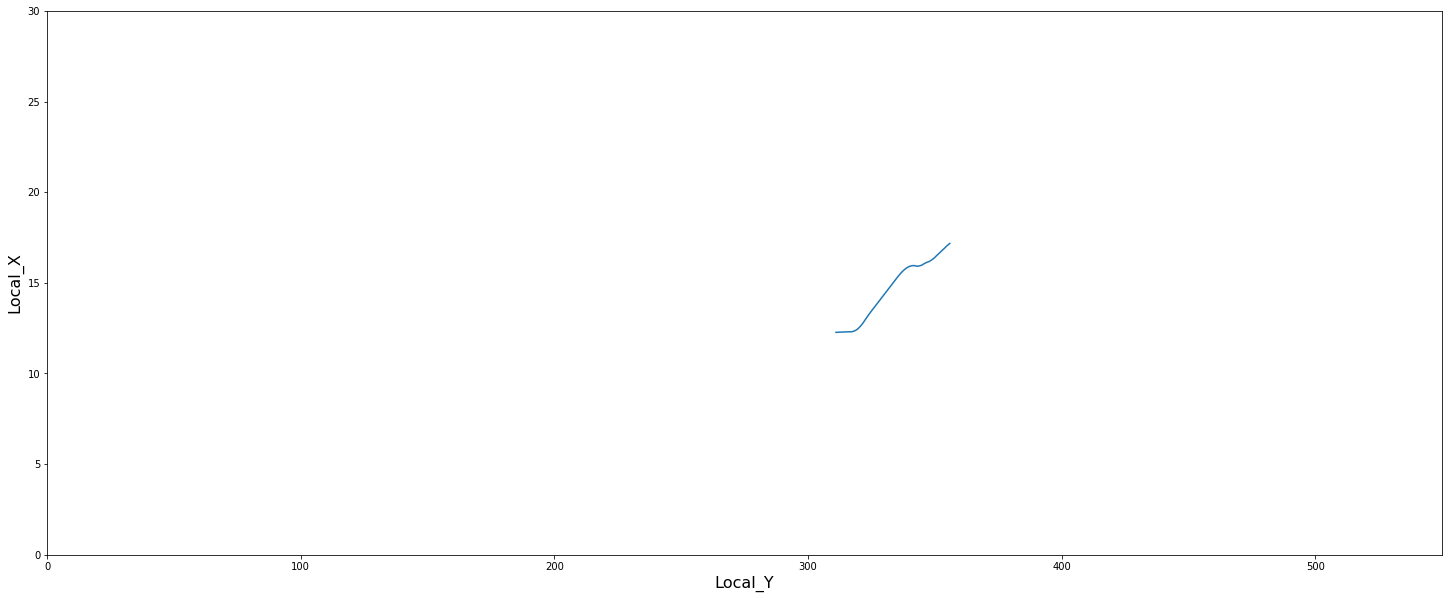

##########################################   9   ###############################################


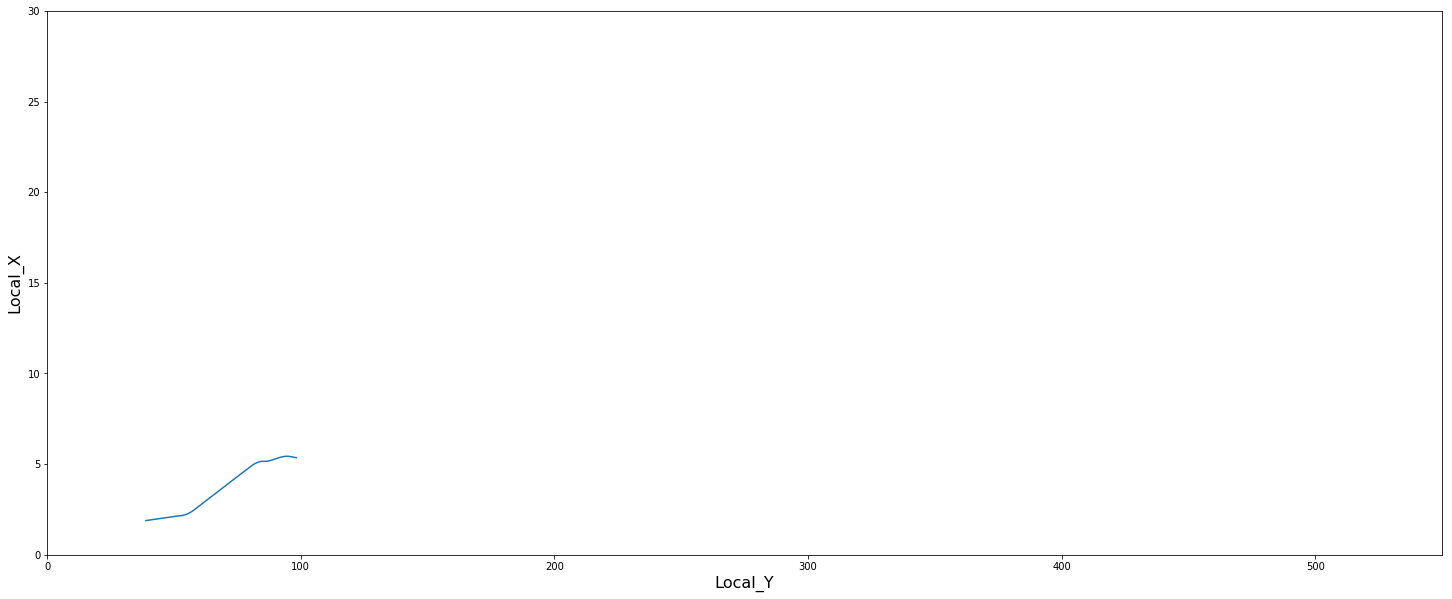

In [12]:
count=0
for path in lane_change_right_I[:10]:
    print("##########################################  ",count,"  ###############################################")
    path=path.to_numpy()
    yline = path[:,[4]].flatten()
    xline = path[:,[5]].flatten()
    figure(figsize=(25,10))
    plt.xlim(0, 550)
    plt.ylim(0, 30)
    plt.plot(xline, yline)
    plt.xlabel('Local_Y', fontsize=16)
    plt.ylabel('Local_X', fontsize=16)
    plt.show()
    count=count+1
#     a=input ("number")
#     if a!="finish":
#         pass
#     else:
#         break

In [ ]:
count=0
for path in lane_keep_I[:250]:
    print("##########################################  ",count,"  ###############################################")
    path=path.to_numpy()
    yline = path[:,[4]].flatten()
    xline = path[:,[5]].flatten()
    figure(figsize=(25,10))
    plt.xlim(0, 550)
    plt.ylim(0, 30)
    plt.plot(xline, yline)
    plt.xlabel('Local_Y', fontsize=16)
    plt.ylabel('Local_X', fontsize=16)
    plt.show()
    count=count+1

## US-101

In [ ]:
lane_keep_US=[]
lane_change_left_US=[]
lane_change_right_US=[]
for path in Vehicles_Trajectoy_US:
    path.reset_index(inplace=True,drop=True)
    if len(path['Lane_ID'].value_counts())>1:
         for i in path['Lane_ID'].diff()[lambda x: x != 0].index.tolist():
             p=pd.concat([path[i-60:i],path[i:i+60]],ignore_index=True)
             if (p['Local_X'].max()-p['Local_X'].min()>3.5) and (p['Local_Y'].max()-p['Local_Y'].min()<300)and (len(p)==120):
                 trend=[p['Lane_ID'][h] for h in p['Lane_ID'].diff()[lambda x: x != 0].index.tolist()]

                 if (trend[0]<trend[1]) and (len(trend)==2):
                     lane_change_right_US.append(p)
                 elif (trend[0]>trend[1]) and (len(trend)==2):
                     lane_change_left_US.append(p)
    elif len(path['Lane_ID'].value_counts())==1:
         chunks = [path[x:x+120] for x in range(0, len(path), 120)]
         for i in chunks: 
             if (i['Local_X'].max()-i['Local_X'].min()<1.5) and (len(i)==120):
                 lane_keep_US.append(i)


print("number of lane keep sequence           : ",len(lane_keep_US))
print("number of lane change left sequence    : ",len(lane_change_left_US))
print("number of lane change right sequence   : ",len(lane_change_right_US))


indexes_change_left_US  = [5,10,18,19,25,26,31,32,33,35,36,38,40,41,42,51,52,53,55,68,70,73,76,78,84,87,91,96,97,
                          98,110,112,113,114,115,116,117,119,133,134,136,144,153,160,161,162,163,170,173,175,176,
                          178,179,184,185,186,187,191,192,194,200,201,202,203,206,209,210,212,213,215,216,217,222,
                          223,229,232,234,240,241,243,245,250,251,257,262,263,264,265,268,272,273,275,276,279,281,
                          284,287,290,291,292,295,296,297,300,303,304,310,311,312,313,314,318,327,329,334,335,336,
                          337,343,345,347]

for index in sorted(indexes_change_left_US , reverse=True):
    del lane_change_left_US[index] 
    
indexes_lane_keep_US=[0,1,3,5,6,9,10,14,15,16,18,20,23,27,28,29,30,31,32,34,40,44,46,48,52,53,56,57,60,61,62,64,66,
                      70,73,74,75,77,79,80,81,84,85,88,90,91,94,95,96,98,100,101,102,103,108,109,113,114,118,123,
                      124,129,131,132,133,134,137,138,139,140,145,149,153,158,159,162,165,168,169,171,176,177,180,
                      184,188,191,192,193,194,206,207,209,213,217,218,222,223,224,227,231,232,236,239,244,246,249,
                      251,252,258,259,260,262,265,267,268,274,275,279,280,283,285,287,288,289,293,306,309,310,314,
                      315,318,322,323,324,328,329,333,334,338,339,341]


for index in sorted(indexes_lane_keep_US , reverse=True):
    del lane_keep_US[index]  
    
print("number of lane keep sequence           : ",len(lane_keep_US))
print("number of lane change left sequence    : ",len(lane_change_left_US))
print("number of lane change right sequence   : ",len(lane_change_right_US))


lane_keep_US=lane_keep_US[:194]
lane_change_left_US=lane_change_left_US[:194]
lane_change_right_US=lane_change_right_US[:194]

print("number of lane keep sequence           : ",len(lane_keep_US))
print("number of lane change left sequence    : ",len(lane_change_left_US))
print("number of lane change right sequence   : ",len(lane_change_right_US))

### Select good trajectory I-80 ;)

In [ ]:
count=0
for path in lane_change_right_US:
    print("##########################################  ",count,"  ###############################################")
    path=path.to_numpy()
    yline = path[:,[4]].flatten()
    xline = path[:,[5]].flatten()
    figure(figsize=(25,10))
    plt.xlim(0, 700)
    plt.ylim(0, 23)
    plt.plot(xline, yline)
    plt.xlabel('Local_Y', fontsize=16)
    plt.ylabel('Local_X', fontsize=16)
    plt.show()
    count=count+1

In [ ]:
count=0
for path in lane_change_left_US:
    print("##########################################  ",count,"  ###############################################")
    path=path.to_numpy()
    yline = path[:,[4]].flatten()
    xline = path[:,[5]].flatten()
    figure(figsize=(25,10))
    plt.xlim(0, 700)
    plt.ylim(0, 23)
    plt.plot(xline, yline)
    plt.xlabel('Local_Y', fontsize=16)
    plt.ylabel('Local_X', fontsize=16)
    plt.show()
    count=count+1

In [ ]:
count=0
for path in lane_keep_US[:400]:
    print("##########################################  ",count,"  ###############################################")
    path=path.to_numpy()
    yline = path[:,[4]].flatten()
    xline = path[:,[5]].flatten()
    figure(figsize=(25,10))
    plt.xlim(0, 700)
    plt.ylim(0, 23)
    plt.plot(xline, yline)
    plt.xlabel('Local_Y', fontsize=16)
    plt.ylabel('Local_X', fontsize=16)
    plt.show()
    count=count+1

## Plot Labeled Maneuver

## I-80

In [9]:
import random
lane_change_left_I=random.sample(lane_change_left_I, 142)

In [ ]:
figure(figsize=(25,20))
subplot(3,1,1)
title('Lane Keep')
for path in lane_keep_I:
    path=path.to_numpy()
    yline = path[:,[4]].flatten()
    xline = path[:,[5]].flatten()
    plt.xlim(0, 550)
    plt.ylim(0, 30)
    plt.plot(xline, yline)
    plt.xlabel('Local_Y', fontsize=16)
    plt.ylabel('Local_X', fontsize=16)
#     for k in np.array([0,4,8,12,16,20]):
#         lat =k*np.ones((1,700)).flatten()#####600
#         y = np.arange(700).flatten()
#         if k!=0:
#             plt.plot(y,lat,dashes=[6, 2],c='k')
#         else:
#             plt.plot(y,lat,c='k')
subplot(3,1,2)
title('Lane Change Left')
for path in lane_change_left_I:
    path=path.to_numpy()
    yline = path[:,[4]].flatten()
    xline = path[:,[5]].flatten()
    plt.xlim(0, 550)
    plt.ylim(0, 30)
    plt.plot(xline, yline)
    plt.xlabel('Local_Y', fontsize=16)
    plt.ylabel('Local_X', fontsize=16)
subplot(3,1,3)
title('Lane Change Right')
for path in lane_change_right_I:
    path=path.to_numpy()
    yline = path[:,[4]].flatten()
    xline = path[:,[5]].flatten()
    plt.xlim(0, 550)
    plt.ylim(0, 30)
    plt.plot(xline, yline)
    plt.xlabel('Local_Y', fontsize=16)
    plt.ylabel('Local_X', fontsize=16)
plt.subplots_adjust(hspace=0.5, wspace=1.0)
plt.show()

## US-101

In [ ]:
figure(figsize=(25,20))
subplot(3,1,1)
title('Lane Keep')
for path in lane_keep_US:
    path=path.to_numpy()
    yline = path[:,[4]].flatten()
    xline = path[:,[5]].flatten()
    plt.xlim(0, 700) 
    plt.ylim(0, 22)
    plt.plot(xline, yline)
    plt.xlabel('Local_Y', fontsize=16)
    plt.ylabel('Local_X', fontsize=16)
#     for k in np.array([0,4,8,12,16,20]):
#         lat =k*np.ones((1,700)).flatten()#####600
#         y = np.arange(700).flatten()
#         if k!=0:
#             plt.plot(y,lat,dashes=[6, 2],c='k')
#         else:
#             plt.plot(y,lat,c='k')
subplot(3,1,2)

title('Lane Change Left')
for path in lane_change_left_US:
    path=path.to_numpy()
    yline = path[:,[4]].flatten()
    xline = path[:,[5]].flatten()
    plt.xlim(0, 700) 
    plt.ylim(0, 22)
    plt.plot(xline, yline)
    plt.xlabel('Local_Y', fontsize=16)
    plt.ylabel('Local_X', fontsize=16)
subplot(3,1,3)

title('Lane Change Right')
for path in lane_change_right_US:
    path=path.to_numpy()
    yline = path[:,[4]].flatten()
    xline = path[:,[5]].flatten()
    plt.xlim(0, 700) 
    plt.ylim(0, 22)
    plt.plot(xline, yline)
    plt.xlabel('Local_Y', fontsize=16)
    plt.ylabel('Local_X', fontsize=16)



plt.subplots_adjust(hspace=0.5, wspace=1.0)
plt.show()

## Drop some of misinformation feature

## I-80

In [10]:
for i in lane_keep_I:
    i.reset_index(drop=True, inplace=True)
    i=i.drop(['Vehicle_ID','Frame_ID','Total_Frames','Global_Time','Local_Y','Lane_ID'],inplace=True, axis=1)
for i in lane_change_left_I:
    i.reset_index(drop=True, inplace=True)
    i=i.drop(['Vehicle_ID','Frame_ID','Total_Frames','Global_Time','Local_Y','Lane_ID'],inplace=True, axis=1)
for i in lane_change_right_I:
    i.reset_index(drop=True, inplace=True)
    i=i.drop(['Vehicle_ID','Frame_ID','Total_Frames','Global_Time','Local_Y','Lane_ID'],inplace=True, axis=1)
print(lane_change_right_I[1])

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


       Local_X     v_Vel     v_Acc
0    16.383610  6.272784 -2.865120
1    16.382086  6.099048  0.057912
2    16.380866  6.108192  0.112776
3    16.379647  6.092952 -0.265176
4    16.376599  6.007608 -1.322832
..         ...       ...       ...
115  20.530109  6.723888  0.268224
116  20.531633  6.763512  0.557784
117  20.528585  6.824472  0.691896
118  20.520050  6.882384  0.554736
119  20.506639  6.925056  0.268224

[120 rows x 3 columns]


## US-101

In [11]:
for i in lane_keep_US:
    i.reset_index(drop=True, inplace=True)
    i=i.drop(['Vehicle_ID','Frame_ID','Total_Frames','Global_Time','Local_Y','Lane_ID'],inplace=True, axis=1)
for i in lane_change_left_US:
    i.reset_index(drop=True, inplace=True)
    i=i.drop(['Vehicle_ID','Frame_ID','Total_Frames','Global_Time','Local_Y','Lane_ID'],inplace=True, axis=1)
for i in lane_change_right_US:
    i.reset_index(drop=True, inplace=True)
    i=i.drop(['Vehicle_ID','Frame_ID','Total_Frames','Global_Time','Local_Y','Lane_ID'],inplace=True, axis=1)
print(lane_change_right_US[1])

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


       Local_X      v_Vel     v_Acc
0    15.801746  12.188952  0.009144
1    15.827959  12.192000  0.048768
2    15.854172  12.195048  0.012192
3    15.878251  12.173712 -0.344424
4    15.909950  12.097512 -1.091184
..         ...        ...       ...
115  19.486474  18.278856 -0.030480
116  19.501714  18.318480  0.618744
117  19.516954  18.446496  1.847088
118  19.519697  18.684240  3.048000
119  19.532498  18.979896  3.118104

[120 rows x 3 columns]


# Normalization & Train/Test Split

## I-80

In [12]:
Lane_Change_Left_Sampel_I=[]
Lane_Change_Right_Sampel_I=[]
Lane_Keep_Sampel_I=[]

for i in lane_change_left_I:
    i['Local_X']=(i['Local_X']-i['Local_X'].min())/(i['Local_X'].max()-i['Local_X'].min())
    i['v_Vel']=(i['v_Vel']-i['v_Vel'].min())/(i['v_Vel'].max()-i['v_Vel'].min())
    i['v_Acc']=(i['v_Acc']-i['v_Acc'].min())/(i['v_Acc'].max()-i['v_Acc'].min())
    Lane_Change_Left_Sampel_I.append(i)
    
for i in lane_change_right_I:
    i['Local_X']=(i['Local_X']-i['Local_X'].min())/(i['Local_X'].max()-i['Local_X'].min())
    i['v_Vel']=(i['v_Vel']-i['v_Vel'].min())/(i['v_Vel'].max()-i['v_Vel'].min())
    i['v_Acc']=(i['v_Acc']-i['v_Acc'].min())/(i['v_Acc'].max()-i['v_Acc'].min())
    Lane_Change_Right_Sampel_I.append(i)
    
for i in lane_keep_I:
    i['Local_X']=(i['Local_X']-i['Local_X'].min())/(i['Local_X'].max()-i['Local_X'].min())
    i['v_Vel']=(i['v_Vel']-i['v_Vel'].min())/(i['v_Vel'].max()-i['v_Vel'].min())
    i['v_Acc']=(i['v_Acc']-i['v_Acc'].min())/(i['v_Acc'].max()-i['v_Acc'].min())
    Lane_Keep_Sampel_I.append(i)
    
    


/home/m/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/m/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/m/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

## US-101

In [13]:
Lane_Change_Left_Sampel_US=[]
Lane_Change_Right_Sampel_US=[]
Lane_Keep_Sampel_US=[]

for i in lane_change_left_US:
    i['Local_X']=(i['Local_X']-i['Local_X'].min())/(i['Local_X'].max()-i['Local_X'].min())
    i['v_Vel']=(i['v_Vel']-i['v_Vel'].min())/(i['v_Vel'].max()-i['v_Vel'].min())
    i['v_Acc']=(i['v_Acc']-i['v_Acc'].min())/(i['v_Acc'].max()-i['v_Acc'].min())
    Lane_Change_Left_Sampel_US.append(i)
    
for i in lane_change_right_US:
    i['Local_X']=(i['Local_X']-i['Local_X'].min())/(i['Local_X'].max()-i['Local_X'].min())
    i['v_Vel']=(i['v_Vel']-i['v_Vel'].min())/(i['v_Vel'].max()-i['v_Vel'].min())
    i['v_Acc']=(i['v_Acc']-i['v_Acc'].min())/(i['v_Acc'].max()-i['v_Acc'].min())
    Lane_Change_Right_Sampel_US.append(i)
    
for i in lane_keep_US:
    i['Local_X']=(i['Local_X']-i['Local_X'].min())/(i['Local_X'].max()-i['Local_X'].min())
    i['v_Vel']=(i['v_Vel']-i['v_Vel'].min())/(i['v_Vel'].max()-i['v_Vel'].min())
    i['v_Acc']=(i['v_Acc']-i['v_Acc'].min())/(i['v_Acc'].max()-i['v_Acc'].min())
    Lane_Keep_Sampel_US.append(i)

/home/m/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/m/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/m/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

## Concat US-101 & I-80

In [14]:
Lane_Change_Left_Sampel=Lane_Change_Left_Sampel_I+Lane_Change_Left_Sampel_US
Lane_Change_Right_Sampel=Lane_Change_Right_Sampel_I+Lane_Change_Right_Sampel_US
Lane_Keep_Sampel=Lane_Keep_Sampel_I+Lane_Keep_Sampel_US


print(len(Lane_Change_Left_Sampel),len(Lane_Change_Right_Sampel),len(Lane_Keep_Sampel))

336 336 336


## Train/Test Split for HMM

In [15]:
print("Length of l_c_l = ",len(Lane_Change_Left_Sampel))
print("Length of l_c_r = ",len(Lane_Change_Right_Sampel))
print("Length of l_k = ",len(Lane_Keep_Sampel))

shuffle(Lane_Change_Left_Sampel)
shuffle(Lane_Change_Right_Sampel)
shuffle(Lane_Keep_Sampel)



l_c_l_Train=Lane_Change_Left_Sampel[0:270]
l_c_l_Test=Lane_Change_Left_Sampel[270:336]

l_c_r_Train=Lane_Change_Right_Sampel[0:270]
l_c_r_Test=Lane_Change_Right_Sampel[270:336]

l_k_Train=Lane_Keep_Sampel[0:270]
l_k_Test=Lane_Keep_Sampel[270:336]

print("Length of l_c_r Train= ",len(l_c_r_Train))
print("Length of l_c_l Train= ",len(l_c_l_Train))
print("Length of l_k Train= ",len(l_k_Train))

print("Length of l_c_r Test= ",len(l_c_r_Test))
print("Length of l_c_l Test= ",len(l_c_l_Test))
print("Length of l_k Test= ",len(l_k_Test))



Length of l_c_l =  336
Length of l_c_r =  336
Length of l_k =  336
Length of l_c_r Train=  270
Length of l_c_l Train=  270
Length of l_k Train=  270
Length of l_c_r Test=  66
Length of l_c_l Test=  66
Length of l_k Test=  66


# HMM Classifier

In [33]:
from pomegranate import *
##Modeling
## n_components=number of hidden states,X=data
Model_3= HiddenMarkovModel.from_samples(MultivariateGaussianDistribution, n_components=14, X=l_k_Train)
Model_1= HiddenMarkovModel.from_samples(MultivariateGaussianDistribution, n_components=14, X=l_c_r_Train)
Model_2= HiddenMarkovModel.from_samples(MultivariateGaussianDistribution, n_components=14, X=l_c_l_Train)


##Fitting
Lane_Keep_Model=Model_3.fit(l_k_Train,algorithm='baum-welch')
Lane_Change_Right_Model=Model_1.fit(l_c_r_Train,algorithm='baum-welch')
Lane_Change_Left_Model=Model_2.fit(l_c_l_Train,algorithm='baum-welch')


## BIC

10.172612740281803 10.172612635390852 9.788956605843477
2
-4.709633199228154 -4.709644857997784 -4.872068984282883
3
38.217796740672696 38.21088334256639 38.07516359567512
4
42.991344004823624 42.9510211765062 42.826135171965404
5
28.60805873557034 28.579972005076254 28.421358344265894
6
14.211007646229756 14.165715499147659 13.943831291316847
7
95.50117834899999 95.58215999680509 95.26584052296445
8
100.33602070726216 100.23834775039899 100.04072698450841
9
124.26063907097516 124.18846643207436 123.9115938327057
10
109.71374528276024 109.76429413164298 109.58433265257582
11
76.32172506151161 76.22239540990475 76.08756497041247
12
81.13885819349399 81.00834464301272 80.77373024663
13
66.59791653950411 66.61082107805966 66.4168515975177
14
52.26004437731402 52.33164115985508 52.00621557059778
15


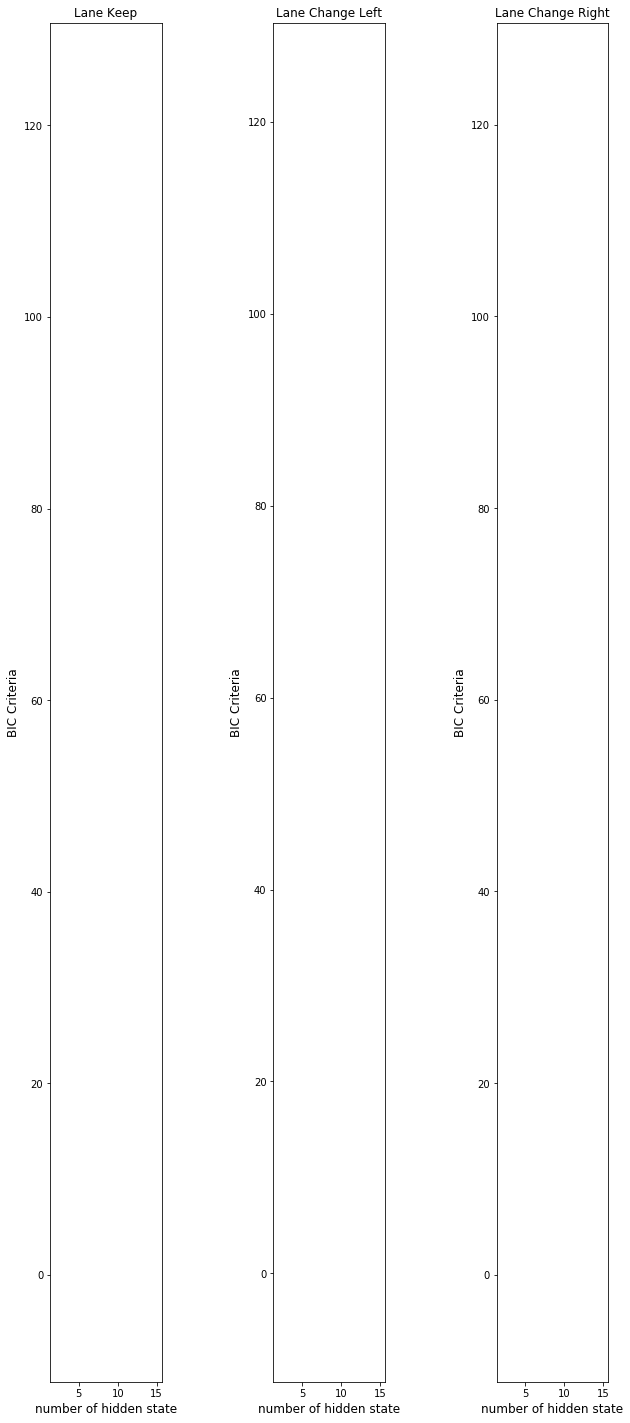

In [19]:
import math
from pomegranate import *
# BIC_l_k=[]
# BIC_l_c_r=[]
# BIC_l_c_l=[]
def gmmhmm(state_number,X):
    Model_c=HiddenMarkovModel.from_samples(MultivariateGaussianDistribution, n_components=state_number, X=X)
    Model1=Model_c.fit(X,algorithm='baum-welch')
    return Model1
figure(figsize=(10,25))
for i in range(2,16):
    l_k=gmmhmm(i,l_k_Train)
    l_kk=np.sum([l_k.log_probability(sequence)for sequence in l_c_r_Train])
    l_c_r=gmmhmm(i,l_k_Train)
    l_cr=np.sum([l_c_r.log_probability(sequence) for sequence in l_c_r_Train])
    l_c_l=gmmhmm(i,l_c_l_Train)
    l_cl=np.sum([l_c_l.log_probability(sequence) for sequence in l_c_l_Train])
    
    p=i^2-1+2*i
    l_k_p=(-2*math.log(l_kk)+p*math.log(120))
    l_c_r_p=(-2*math.log(l_cr)+p*math.log(120))
    l_c_l_p=(-2*math.log(l_cl)+p*math.log(120))
    print(l_k_p,l_c_r_p,l_c_l_p)
#     BIC_l_k.append(l_k_p)
#     BIC_l_c_r.append(l_c_r_p)    
#     BIC_l_c_l.append(l_c_l_p)
    subplot(1,3,1)
    title('Lane Keep')
#     for i in BIC_l_k:
    plt.plot(i, l_k_p,markersize=22)
    plt.xlabel('number of hidden state', fontsize=12)
    plt.ylabel('BIC Criteria', fontsize=12)
    subplot(1,3,2)
    title('Lane Change Left')
#     for path in lane_change_left:
    plt.plot(i, l_c_l_p,markersize=22)
    plt.xlabel('number of hidden state', fontsize=12)
    plt.ylabel('BIC Criteria', fontsize=12)

    subplot(1,3,3)
    title('Lane Change Right')
#     for path in lane_change_right:
    plt.plot(i,l_c_r_p,markersize=22)
    plt.xlabel('number of hidden state', fontsize=12)
    plt.ylabel('BIC Criteria', fontsize=12)
    
    print(i)


plt.subplots_adjust(hspace=0.5, wspace=1.0)
plt.show()

In [ ]:
Model_1.graph

In [ ]:
a=[Lane_Keep_Model.log_probability(sequence) for sequence in l_c_r_Train]
print(a)
print(len(a))

## Confusion Matrix

length list_l_k_Test 66
length list_l_c_l_Test 66
length list_l_c_r_Test 66
lengh of all test data :  198
[[31 11 24]
 [ 1 64  1]
 [ 0  0 66]]


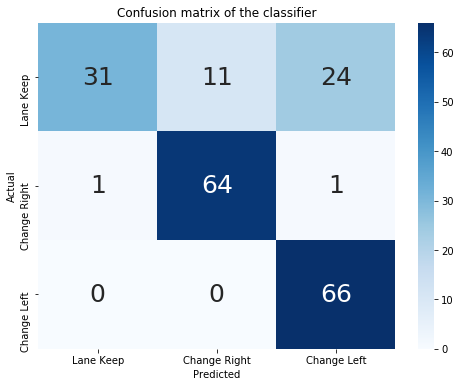

In [34]:
# l_k_Test
# l_c_l_Test
# l_c_r_Test

list_l_k_Test=[[]]
count=0
for i in l_k_Test:
    #print("D")
    #print(list_l_k_Test)
    list_l_k_Test[count].append(i) 
    list_l_k_Test[count].append("Lane Keep")
    list_l_k_Test.append([])
    count=count+1
del list_l_k_Test[-1]
print("length list_l_k_Test",len(list_l_k_Test))

list_l_c_l_Test=[[]]
count=0
for i in l_c_l_Test:
    #print("D")
    #print(list_l_k_Test)
    list_l_c_l_Test[count].append(i) 
    list_l_c_l_Test[count].append("Change Left")
    list_l_c_l_Test.append([])
    count=count+1
del list_l_c_l_Test[-1]
print("length list_l_c_l_Test",len(list_l_c_l_Test))

list_l_c_r_Test=[[]]
count=0
for i in l_c_r_Test:
    list_l_c_r_Test[count].append(i) 
    list_l_c_r_Test[count].append("Change Right")
    list_l_c_r_Test.append([])
    count=count+1
del list_l_c_r_Test[-1]
print("length list_l_c_r_Test",len(list_l_c_r_Test))

All_Test = list_l_c_r_Test + list_l_k_Test + list_l_c_l_Test
print("lengh of all test data : ",len(All_Test))
shuffle(All_Test)

from sklearn.metrics import confusion_matrix
y_true = []
y_pred = []
L_K=[]
L_C_R=[]
L_C_L=[]
for i in range(len(All_Test)):
    Turn_Left=Lane_Change_Left_Model.log_probability(All_Test[i][0])
    L_C_L.append(Turn_Left)
    Turn_Right=Lane_Change_Right_Model.log_probability(All_Test[i][0])
    L_C_R.append(Turn_Right)
    straight=Lane_Keep_Model.log_probability(All_Test[i][0])
    L_K.append(straight)
    y_true.append(All_Test[i][1])
    
    
    if (Turn_Left>Turn_Right) and (Turn_Left> straight):
        #print("###Prediction = Lane_Change_Left")
        y_pred.append("Change Left")
    elif (Turn_Right>Turn_Left) and (Turn_Right> straight):
        #print("###Prediction = Lane_Change_Right")
        y_pred.append("Change Right")
    elif (straight>Turn_Left) and (straight> Turn_Left):
        #print("###3Prediction = Lane_Keep")
        y_pred.append("Lane Keep")


import matplotlib.pyplot as plt
import seaborn
labels = ["Lane Keep", "Change Right","Change Left"]
conf_mat =confusion_matrix(y_true, y_pred,labels)
print(conf_mat)
fig, ax = plt.subplots(figsize=(8,6))
seaborn.heatmap(conf_mat, annot=True, fmt='d',annot_kws={'fontsize': 25},cmap = "Blues"
                ,xticklabels=labels,yticklabels=labels)
# ax.set_xticklabels([''] + labels)
# ax.set_yticklabels([''] + labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix of the classifier')
plt.show()

In [31]:
def accuracy(conf_mat):
    diagonal_sum = conf_mat.trace()
    sum_of_all_elements = conf_mat.sum()
    return diagonal_sum / sum_of_all_elements 

from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_true, y_pred)

/home/m/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [32]:
print('accuracy = ',accuracy(conf_mat))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

accuracy =  0.6666666666666666
precision: [0.7173913  0.62264151 0.        ]
recall: [1. 1. 0.]
fscore: [0.83544304 0.76744186 0.        ]
support: [66 66 66]


# RNN Models

In [14]:
from matplotlib import pyplot as plt
import datetime
from datetime import datetime
import matplotlib.pyplot as plt 
import math
import os
import os.path
import tensorflow as tf
import time
from pylab import *

## Sequence Labeling

In [100]:
from sklearn.model_selection import train_test_split
def label_sticking(path,label):     
    Sample=[[]]
    count=0
    for i in path:
        Sample[count].append(i) 
        Sample[count].append(label)
        Sample.append([])
        count=count+1
    del Sample[-1]
    print("length of {}  list :".format(label),len(path))
    return Sample
lane_keep=label_sticking(Lane_Keep_Sampel,label="Lane Keep")
lane_change_left=label_sticking(Lane_Change_Left_Sampel,label="Change Left")
lane_change_right=label_sticking(Lane_Change_Right_Sampel,label="Change Right")
All=lane_keep+lane_change_left+lane_change_right
#print(len(All))
Data=[[i[0].to_numpy(),i[1]] for i in All]
shuffle(Data)


#print(len(Data))
x=[]
y=[]
for i in Data:
    x.append([i[0]])
    if i[1]=='Lane Keep':
        y.append([0,0,1])
    if i[1]=='Change Left':
        y.append([0,1,0])
    if i[1]=='Change Right':
        y.append([1,0,0])
    
x= np.vstack(x)
y= np.vstack(y)

    
print("x shape :",x.shape)       
print("y shape :",y.shape) 

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,train_size=0.8)

length of Lane Keep  list : 336
length of Change Left  list : 336
length of Change Right  list : 336
x shape : (1008, 120, 3)
y shape : (1008, 3)


In [101]:
x_train.shape, x_test.shape

((806, 120, 3), (202, 120, 3))

In [102]:
from numpy import mean ,std ,dstack
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM, BatchNormalization, Bidirectional
from keras.layers import GRU
from keras.utils import to_categorical
from matplotlib import pyplot
from keras.models import Model, Input
from keras.layers import Conv2D, MaxPooling2D, Flatten

In [103]:
n_timesteps= x_train.shape[1]
n_features =x_train.shape[2]

## Models

In [197]:
def model_v1():

  # implement bidirectional lstm

  model = Sequential()
  model.add(
      Bidirectional(
          LSTM(15, input_shape=(100,3))
      )
  )

  model.add( BatchNormalization() )
  model.add(Dropout(0.4))

  model.add(Dense(40, activation='relu'))

  model.add( BatchNormalization() )
  model.add( Dropout(.4) )

  model.add(Dense(3, activation='softmax'))

  return model

In [21]:
def model_v2():

  # use gru instead of lstm

    model = Sequential()
    model.add(Bidirectional(GRU(15, input_shape=(120,3))))
    model.add( BatchNormalization() )
    model.add(Dropout(0.4))

    model.add(Dense(40, activation='relu'))

    model.add( BatchNormalization() )
    model.add( Dropout(.4) )

    model.add(Dense(3, activation='softmax'))
    model.summary()
    return model

In [79]:
def model_v3():

    # use convolution instead of rnn
    input = Input((1, 120, 3))
    x = Conv2D(5, 1)(input)
    x = Flatten()(x)
    x = Dense(20, activation="relu")(x)
    output = Dense(3, activation="softmax")(x)

    return Model(input, output)

In [76]:
# def model_v3():
#     model = Sequential()
#     model.add(Conv2D(120,(5, 1), input_shape=(1,120,3)))##     
#     model.add(Flatten())
#     model.add(Dense(40))
#     model.add(Activation('relu'))
#     model.add(Dense(3))
#     model.add(Activation('softmax'))
#     model.summary()
#     return model

## LSTM

In [198]:
def train_rnn():

  global model

  # reproduce same result
  # reset_random_seeds()

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  # fit network
  #batch_size=15
  num_epochs=35

  h=model.fit(x_train,  y_train, validation_split=.3, epochs=num_epochs, verbose=True)

  return model, h

In [199]:
model = model_v1()

model, h = train_rnn()
model.summary()

Epoch 1/35

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

18/18 [==============================] - 1s 77ms/step - loss: 1.2685 - accuracy: 0.4858 - val_loss: 1.0330 - val_accuracy: 0.5289
Epoch 2/35
18/18 [==============================] - 1s 47ms/step - loss: 0.8567 - accuracy: 0.6348 - val_loss: 0.9972 - val_accuracy: 0.3884
Epoch 3/35
18/18 [==============================] - 1s 49ms/step - loss: 0.8176 - accuracy: 0.6844 - val_loss: 0.9871 - val_accuracy: 0.3512
Epoch 4/35
18/18 [==============================] - 1s 47ms/step - loss: 0.7509 - acc

In [200]:
scores = model.evaluate(x_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

7/7 [==============================] - 0s 9ms/step - loss: 0.2252 - accuracy: 0.9059
Accuracy: 90.59%


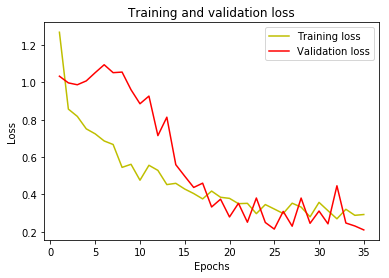

In [201]:
loss = h.history['loss']
val_loss = h.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [177]:
predictions = model.predict(x_test)
y_pred=[np.argmax(np.round(i)) for i in predictions]
y_true=[]
#print(y_test[0][0],y_test[0][1],y_test[0][2])
for i in y_test:
    if i[0]==1:
        y_true.append(0)
    if i[1]==1:
        y_true.append(1)
    if i[2]==1:
        y_true.append(2)
#     if i==array([0, 0, 1]):
#         print(111111111111111111111)
#         y_true.append(0)
#     if i==array([0, 1, 0]):
#         y_true.append(1)
#     if i==array([1, 0, 0]):
#         y_true.append(2)

print('y_test :',y_pred,'y_true :',y_true)
print(len(y_pred),len(y_true))

y_test : [2, 0, 0, 1, 2, 2, 2, 1, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 1, 2, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 2, 0, 1, 0, 0, 0, 1, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 2, 0, 2, 0, 1, 1, 0, 0, 2, 1, 1, 2, 2, 2, 0, 0, 2, 2, 1, 0, 2, 1, 1, 2, 1, 0, 1, 0, 2, 0, 1, 1, 0, 1, 2, 0, 0, 0, 2, 0, 2, 2, 0, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 2, 1, 2, 0, 0, 2, 0, 0, 2, 1, 1, 1, 0, 1, 1, 2, 2, 0, 0, 1, 1, 0, 1, 0, 2, 2, 2, 0, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 0, 2, 1, 2, 0, 0, 1, 2, 2, 0, 1, 1, 0, 1, 0, 2, 0, 2, 2, 2, 0, 2, 1, 0, 0, 1, 0, 1, 1, 0, 2, 1, 0, 0, 1, 1, 2, 2, 1, 2, 1, 0, 0, 0, 0, 1, 1, 2] y_true : [2, 0, 0, 1, 2, 0, 2, 1, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 1, 2, 2, 2, 0, 0, 2, 0, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 2, 0, 2, 0, 1, 1, 0, 0, 1, 1, 1, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 1, 2, 1, 0, 1, 0, 2, 2, 1, 1, 0, 1, 2, 2, 0, 0, 2, 0, 2, 2, 0, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 2, 1, 2, 0, 0, 2, 0, 0, 2, 1, 1,

[[61  0 11]
 [ 0 60  0]
 [ 4  2 64]]


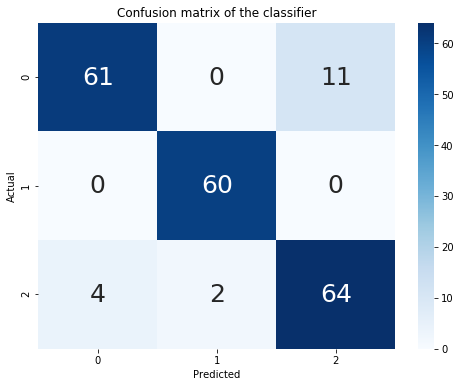

In [179]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn
labels = ["Lane Keep", "Change Right","Change Left"]
conf_mat =confusion_matrix( y_pred,y_true)
print(conf_mat)
fig, ax = plt.subplots(figsize=(8,6))
seaborn.heatmap(conf_mat, annot=True, fmt='d',annot_kws={'fontsize': 25},cmap = "Blues")
# ax.set_xticklabels([''] + labels)
# ax.set_yticklabels([''] + labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix of the classifier')
plt.show()

## GRU

In [42]:
model = model_v2()
model, h = train_rnn()

Epoch 1/40

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

38/38 [==============================] - 3s 73ms/step - loss: 1.6335 - accuracy: 0.3440 - val_loss: 0.9986 - val_accuracy: 0.5289
Epoch 2/40
38/38 [==============================] - 2s 65ms/step - loss: 1.0091 - accuracy: 0.5869 - val_loss: 0.8982 - val_accuracy: 0.5992
Epoch 3/40
38/38 [==============================] - 2s 65ms/step - loss: 0.8623 - accuracy: 0.6383 - val_loss: 0.8370 - val_accuracy: 0.5620
Epoch 4/40
38/38 [==============================] - 2s 65ms/step - loss: 0.8261 - acc

In [48]:
scores = model.evaluate(x_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

7/7 [==============================] - 0s 9ms/step - loss: 0.1728 - accuracy: 0.9257
Accuracy: 92.57%


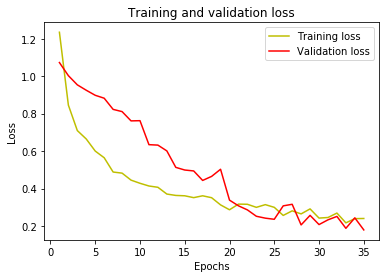

In [49]:
loss = h.history['loss']
val_loss = h.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Convolutional

In [80]:
def train_conv():
    global conv_model
  # reproduce same result
  # reset_random_seeds()

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  
    # fit network
    batch_size=12
    num_epochs=20

    h=model.fit(conv_x_train, y_train, validation_split=.3 ,batch_size=batch_size,
                epochs=num_epochs, verbose=True)

    return model, h

In [81]:
conv_x_train = x_train.reshape((806, 1, 120, 3))
conv_x_test = x_test.reshape((202, 1, 120, 3))

In [82]:
model = model_v3()
model, h = train_conv()

Epoch 1/20
47/47 [==============================] - 0s 4ms/step - loss: 0.5367 - accuracy: 0.7837 - val_loss: 0.3702 - val_accuracy: 0.8388
Epoch 2/20
47/47 [==============================] - 0s 2ms/step - loss: 0.3050 - accuracy: 0.8723 - val_loss: 0.3539 - val_accuracy: 0.8471
Epoch 3/20
47/47 [==============================] - 0s 2ms/step - loss: 0.2748 - accuracy: 0.8954 - val_loss: 0.3490 - val_accuracy: 0.8595
Epoch 4/20
47/47 [==============================] - 0s 2ms/step - loss: 0.2259 - accuracy: 0.9096 - val_loss: 0.2863 - val_accuracy: 0.8719
Epoch 5/20
47/47 [==============================] - 0s 2ms/step - loss: 0.2107 - accuracy: 0.9220 - val_loss: 0.3011 - val_accuracy: 0.8636
Epoch 6/20
47/47 [==============================] - 0s 2ms/step - loss: 0.1872 - accuracy: 0.9291 - val_loss: 0.2809 - val_accuracy: 0.8678
Epoch 7/20
47/47 [==============================] - 0s 2ms/step - loss: 0.1792 - accuracy: 0.9379 - val_loss: 0.2786 - val_accuracy: 0.8678
Epoch 8/20
47/47 [==

In [84]:
scores = model.evaluate(conv_x_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

7/7 [==============================] - 0s 1ms/step - loss: 0.1579 - accuracy: 0.9554
Accuracy: 95.54%


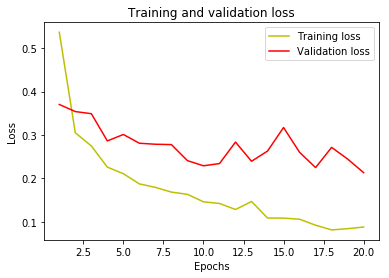

In [85]:
loss = h.history['loss']
val_loss = h.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [1]:
q=[a b c;d e f;g h i]
p=[w m k;w d a;f g a]
g=[]
for i in q:
    for j in p*:
        g(i)=i*j

SyntaxError: invalid syntax (<ipython-input-1-9b795dc5d2d9>, line 1)

In [2]:
p=0
for i in range(10):
    p=i+p
print(p)

45


In [43]:
import math
def ONe(x):
    if x>0:
        p=1
    else:
        p=0
    while x/2>=1:
        if 2*math.floor(x/2)==x:
            pass
        else:
            p+=1
        x=math.floor(x/2)
        
    return p  

In [45]:
ONe(0)

0

In [10]:
int a
a=5/2

SyntaxError: invalid syntax (<ipython-input-10-0565df0fec74>, line 1)